## 恒星物理第一次编程作业
首先计算相关的物理量：
$$
\rho(r)=\rho_c [1-(\frac{r}{R})^2]
$$
$$
m(r)=\int_{0}^{r}4\pi r^2 \rho(r) dr=4\pi \rho_c (\frac{r^3}{3}-\frac{r^5}{5R^2})
$$
利用边界条件$m(R)=M$,可得：
$$
M=\frac{8\pi \rho_c R^3}{15} \Longrightarrow \rho_c=\frac{15M}{8\pi R^3}
$$
自引力势能：
$$
\Omega_s(r)=-\int_{0}^{m(r)}\frac{Gmdm}{r}=-\int_{0}^{r}Gm(r)\rho(r)4\pi r dr
$$

### （1）.
首先将前面$m(r)$的方程写为：
$$
\frac{m(r)}{M}=\frac{15}{2}(\frac{r^3}{3R^3}-\frac{r^5}{5R^5})
$$
由此可以先绘制$\frac{m(r)}{M}$与$\frac{r}{R}$的关系图

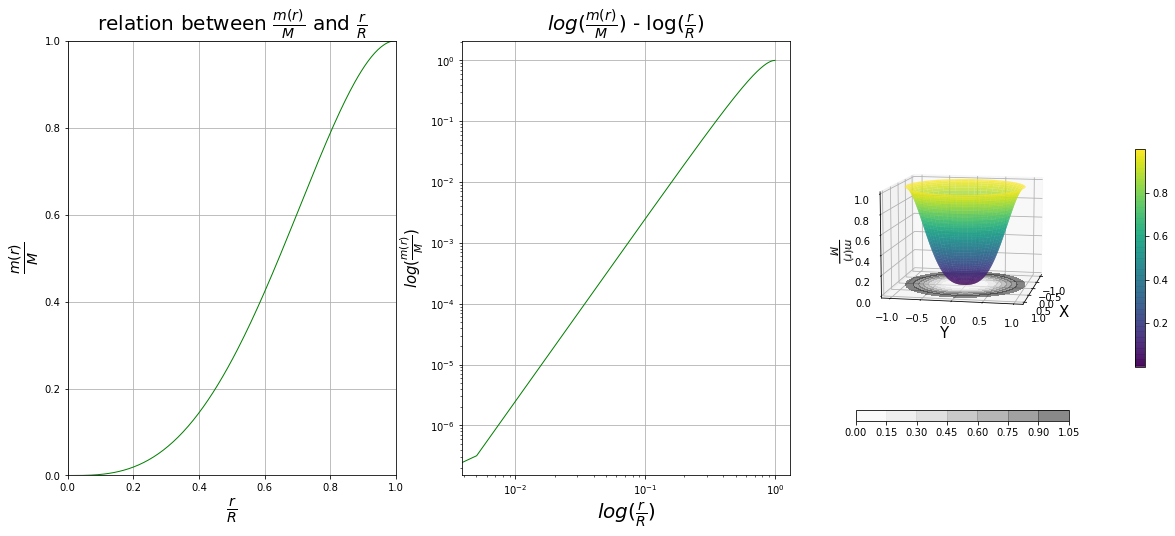

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,8))
ax1 = plt.subplot(131)
ax3 = plt.subplot(132)
ax2 = plt.subplot(133,projection="3d")

# Create the mesh in polar coordinates
r = np.linspace(0, 1, 200)
p = np.linspace(0, 2*np.pi, 1000)
R, P = np.meshgrid(r, p)
Z =15/2*(R**3/3-R**5/5)
# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

#m(r)/m - r/R plot 
m_r=15/2*(r**3/3-r**5/5)
ax1.plot(r,m_r, lw=1, label="m_r",c="g")
ax1.grid(True)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_ylabel(r"$\frac{m(r)}{M}$",fontsize=20)
ax1.set_xlabel(r"$\frac{r}{R}$",fontsize=20)
ax1.set_title(r"relation between $\frac{m(r)}{M}$ and $\frac{r}{R}$",fontsize=20)

#双对数坐标轴
ax3.plot(r,m_r, lw=1, label="m_r",c="g")
ax3.grid(True)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r"$log(\frac{m(r)}{M})$",fontsize=15)
ax3.set_xlabel(r"$log(\frac{r}{R})$",fontsize=20)
ax3.set_title(r"$log(\frac{m(r)}{M}$) - log($\frac{r}{R}$)",fontsize=20)

#3d plot
fig2=ax2.plot_surface(X, Y, Z, cmap=plt.cm.viridis,alpha=0.8)
cset = ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.Greys,alpha=0.5)
fig.colorbar(fig2,shrink=0.5,pad=0.2)
fig.colorbar(cset,shrink=1,orientation='horizontal')
ax2.set_xlabel("X",size=15)
ax2.set_ylabel("Y",fontsize=15)
ax2.set_zlabel(r"$\frac{m(r)}{M}$",fontsize=15)
ax2.view_init(elev=10., azim=11)
plt.savefig(r"1.jpg",dpi=300)
plt.show()

绘制结果如上图所示，左图为$m(r)/M$与$r/R$的关系图，中间为双对数坐标轴画图，右图为这一关系式在3维中的形式

### （2）.
由最前面的公式有：
$$
\Omega_s(r)=-\int_{0}^{r}Gm(r)\rho(r)4\pi r dr\\
=-4\pi G \rho_c^2 \int_{0}^{r}(\frac{r^3}{3}-\frac{r^5}{5R^2})[1-(\frac{r}{R})^2] 4\pi r dr\\
=-16\pi^2G\rho_c^2(\frac{r^5}{15}-\frac{8r^7}{105R^2}+\frac{r^9}{45R^4})\\
=-16\pi^2 G (\frac{15M}{8\pi R^3})^2 (\frac{r^5}{15}-\frac{8r^7}{105R^2}+\frac{r^9}{45R^4})
$$

注意到上式可化为：
$$
\frac{\Omega_s(r)}{-GM^2/R}=\frac{225}{4}(\frac{r^5}{15R^5}-\frac{8r^7}{105R^7}+\frac{r^9}{45R^9})
$$
由该式可以绘制出如下的曲线:

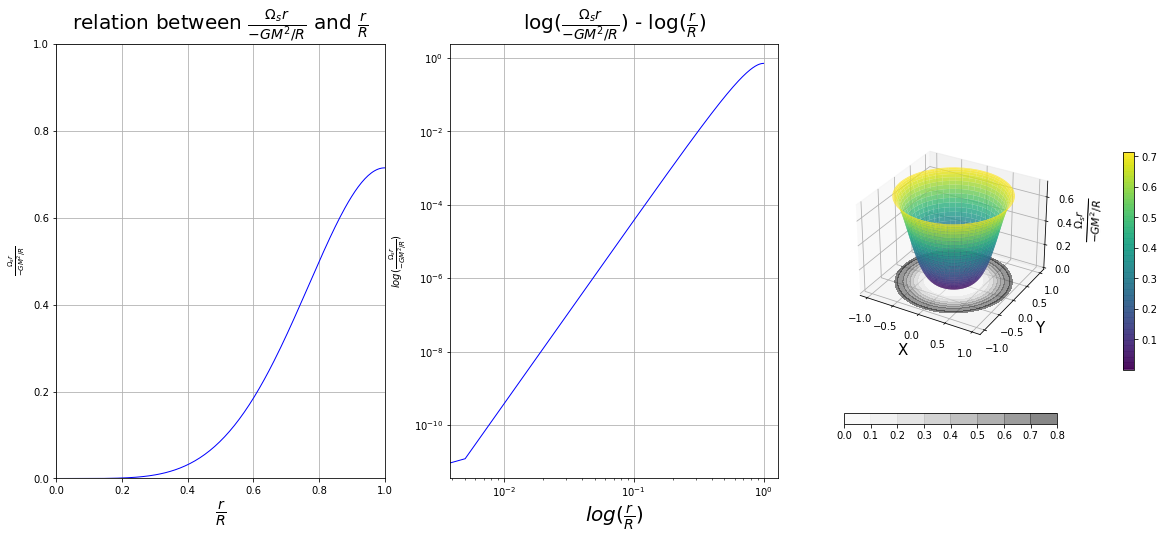

In [20]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,8))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133,projection="3d")

# Create the mesh in polar coordinates
r = np.linspace(0, 1, 200)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = 225/4 * (R**5/15-(8*R**7)/105+R**9/45)
# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

#gravitational potential plot 
omega_r=225/4 * (r**5/15-(8*r**7)/105+r**9/45)
ax1.plot(r,omega_r, lw=1, label="m_r",c="b")
ax1.grid(True)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_ylabel(r"$\frac{\Omega_s{r}}{-GM^2/R}$",fontsize=10)
ax1.set_xlabel(r"$\frac{r}{R}$",fontsize=20)
ax1.set_title(r"relation between $\frac{\Omega_s{r}}{-GM^2/R}$ and $\frac{r}{R}$",fontsize=20)

#双对数坐标轴
ax2.plot(r,omega_r, lw=1, label="omega_r",c="b")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel(r"$log(\frac{\Omega_s{r}}{-GM^2/R}$)",fontsize=10)
ax2.set_xlabel(r"$log(\frac{r}{R})$",fontsize=20)
ax2.set_title(r"log($\frac{\Omega_s{r}}{-GM^2/R}$) - log($\frac{r}{R}$)",fontsize=20)

#3d plot
fig3=ax3.plot_surface(X, Y, Z, cmap=plt.cm.viridis,alpha=0.8)
cset = ax3.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.Greys,alpha=0.5)
fig.colorbar(fig3,shrink=0.5,pad=0.2)
fig.colorbar(cset,shrink=1,orientation='horizontal')
ax3.set_xlabel("X",size=15)
ax3.set_ylabel("Y",fontsize=15)
ax3.set_zlabel(r"$\frac{\Omega_s{r}}{-GM^2/R}$",fontsize=15,labelpad=6.0)
plt.savefig(r"2.jpg",dpi=300)
plt.show()

左侧为直接的关系图，中间为双对数坐标轴图，右图为3维表示，底部阴影表示等值线